In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
#from resnets_utils import *
from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow
%matplotlib inline
import tensorflow as tf

import keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)
K.set_image_dim_ordering('th')

Using TensorFlow backend.


In [4]:
def one_hot_matrix(labels,C):
    C=tf.constant(C,name='C')
    one_hot_matrix = tf.one_hot(indices=labels,depth=C,axis=0,name="one_hot_matrix")
    sess=tf.Session()
    one_hot = sess.run(one_hot_matrix)
    sess.close()
    return one_hot

In [5]:
df=pd.read_csv("digit_recognizer/train.csv")

In [6]:
Y=df.pop("label")
X=df

In [7]:
X=np.array(X).reshape(-1,28,28,1)

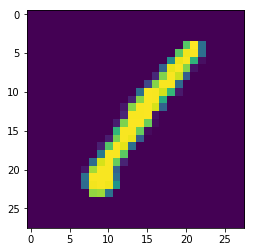

In [8]:
imshow(X[0].reshape(28,28))

In [9]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state=0,test_size=.05)

C:\Program Files\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
X_train = X_train/255.
X_test = X_test/255.

# Convert training and test labels to one hot matrices
Y_train = one_hot_matrix(y_train, 10).T
Y_test = one_hot_matrix(y_test, 10).T

In [10]:
def LeNet(input_shape=(28,28,1),classes=10):
    
    X_input=Input(input_shape)
    
    X=Conv2D(filters=20,kernel_size=(5,5),name = 'conv1', kernel_initializer = glorot_uniform(seed=1),data_format="channels_last")(X_input)
    X = Activation('relu')(X)
    X=MaxPooling2D(pool_size=(2,2),strides=(2,2))(X)

    X=Conv2D(filters=50,kernel_size=(5,5),name = 'conv2', kernel_initializer = glorot_uniform(seed=1),data_format="channels_last")(X)
    X = Activation('relu')(X)
    X=MaxPooling2D(pool_size=(2,2),strides=(2,2))(X)   
    
    X=Conv2D(filters=100,kernel_size=(2,2),name = 'conv3', kernel_initializer = glorot_uniform(seed=1),data_format="channels_last")(X)
    X = Activation('relu')(X)
    X=MaxPooling2D(pool_size=(2,2),strides=(2,2))(X)
        
    X = Flatten()(X)
    X = Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer = glorot_uniform(seed=1))(X)
    
    model = Model(inputs = X_input, outputs = X, name='LeNet50')
    
    return model

In [11]:
model1 = LeNet(input_shape = (28,28,1), classes = 10)

In [12]:
model1.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])

In [131]:
model1.fit(X_train,Y_train,epochs=2,batch_size=32)

Epoch 1/2
39900/39900 [==============================] - 322s 8ms/step - loss: 0.0040 - acc: 0.9989
Epoch 2/2
39900/39900 [==============================] - 325s 8ms/step - loss: 0.0062 - acc: 0.9984


In [132]:
model1.evaluate(X_test,Y_test)

2100/2100 [==============================] - 10s 5ms/step


[0.10031201556675418, 0.98904761904761906]

In [11]:
def LeNet_with_dropout(input_shape=(28,28,1),classes=10):
    
    seed=0
    X_input=Input(input_shape)
    
    X=Conv2D(filters=20,kernel_size=(5,5),name = 'conv1', kernel_initializer = glorot_uniform(seed=1),data_format="channels_last")(X_input)
    X=layers.BatchNormalization()(X)
    X=layers.Dropout(0.2,seed=0)(X)
    X = Activation('relu')(X)
    X=MaxPooling2D(pool_size=(2,2),strides=(2,2))(X)
    

    X=Conv2D(filters=50,kernel_size=(5,5),name = 'conv2', kernel_initializer = glorot_uniform(seed=1),data_format="channels_last")(X)
    X=layers.BatchNormalization()(X)
    X=layers.Dropout(0.3,seed=0)(X)
    X = Activation('relu')(X)
    X=MaxPooling2D(pool_size=(2,2),strides=(2,2))(X)
    
    X=Conv2D(filters=100,kernel_size=(2,2),name = 'conv3', kernel_initializer = glorot_uniform(seed=1),data_format="channels_last")(X)
    X=layers.BatchNormalization()(X)
    X = Activation('relu')(X)
    X=MaxPooling2D(pool_size=(2,2),strides=(2,2))(X)
    
    X = Flatten()(X)
    X = Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer = glorot_uniform(seed=1))(X)
    
    model = Model(inputs = X_input, outputs = X, name='LeNet50')
    
    return model

In [12]:
model2= LeNet_with_dropout(input_shape = (28,28,1), classes = 10)

In [13]:
model2.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])

In [138]:
model2.fit(X_train,Y_train,epochs=1,batch_size=32)

Epoch 1/1
39900/39900 [==============================] - 609s 15ms/step - loss: 0.0075 - acc: 0.9973


In [141]:
model2.evaluate(X_test,Y_test)

2100/2100 [==============================] - 14s 6ms/step


[0.033639810009486348, 0.99190476190476196]

In [124]:
model2.save("digit_recognizer/LeNet_dropout.h5")

In [143]:
test = test/255.

In [144]:
test=np.array(test).reshape(-1,28,28,1)

In [145]:
predictions=model2.predict(test)

In [146]:
r=predictions.argmax(axis=1)

In [147]:
submission=pd.read_csv("digit_recognizer/sample_submission.csv")

In [148]:
submission["Label"]=r

In [149]:
submission.to_csv("digit_recognizer/submission.csv",index=None)

In [4]:
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
